In [174]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import math
import matplotlib.mlab as mlab

## Exercise 1

In [148]:
url = "https://raw.githubusercontent.com/DavidePosillipo/ProbabilityAndStatistics/master/Assignment_3/bigcity.csv"
df = pd.read_csv(url, index_col=0)

In [193]:
df.head()

,u,x
1,138,143
2,93,104
3,61,69
4,179,260
5,48,75


In [194]:
#An estimator of theta is a function of the given sample. 
#In our case this function is the ratio between the expected value of 'x' and the expected value of 'u';
#theta_hat = E(x_hat)/E(u_hat) where x_hat,u_hat are the values of our sample.
theta_hat = np.mean(df['x']) / np.mean(df['u'])
theta_hat

1.2390185991294025

In [195]:
#The bootstrap is a method for estimating standard errors and computing confidence intervals;
#it is used for the evaluation of the performance of estimation procedures, for approximating estimation biases and standard errors. 

# what we need to do is a pair bootstrap for the mean of u and x, being the 
# variables related to each other (meaning: we have to take always the x and the corresponding u
# i order to properly compute the confidence interval)

def pairs_bs(x,u, size=1): #now we have to compute a double resampling, how can be done? 
    indices= np.arange(len(x))
    mean= np.empty(size)
    for i in range(size):
        bs_indexes= np.random.choice(indices, size= len(indices))
        mean[i]= np.mean(x[bs_indexes])/np.mean(u[bs_indexes])
    return mean

In [196]:
#Calculate the biasedness of theta_hat through bootstrap replication.
bootstrap_mean = pairs_bs(df['x'],df['u'], size=1000)

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [197]:
#The estimator overestimate the true value calculated through bootstrap replication.
bias = theta_hat - np.mean(bootstrap_mean)
print(bias)

0.0017954938643542917


In [198]:
np.std(bootstrap_mean)
# having a big sample obtained through bootstrap, we computed the std of this one

0.03633584795448752

In [199]:
# using the same sample as before 
conf_interval = np.percentile(bootstrap_mean, [5.,95.])
print(conf_interval)

[1.18266595 1.29921931]


## Exercise 2

In [200]:
def inverseFunction(n, mu = 1, alpha = 1):
    uniform = np.random.random(n)
    sample = np.zeros(n)
    for i in range(n):
        inverse_f = mu * np.power(np.log(1/(1-uniform[i])),1/alpha)
        if inverse_f > 0:
            sample[i] = inverse_f
    return sample

In [201]:
# We want to sample from the Weibull distribution and we have access to the inverse of the CDF of Y so we generate 
# a random uniform and evaluate the function F inverse of U and what we obtain will be a simulation from the 
# Weibull distribution. 

(array([519120., 248712., 120032.,  57048.,  27608.,  13302.,   6237.,
          2911.,   1454.,    665.]),
 array([2.36812773e-03, 7.36193060e-01, 1.47001799e+00, 2.20384293e+00,
        2.93766786e+00, 3.67149279e+00, 4.40531772e+00, 5.13914266e+00,
        5.87296759e+00, 6.60679252e+00, 7.34061746e+00]),
 <a list of 10 Patch objects>)

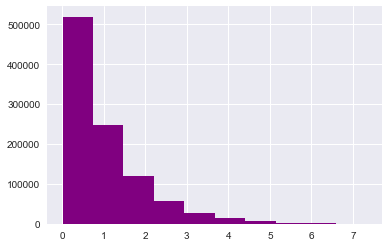

In [202]:
#plot the results of the weibull distribution
plt.hist(stats.exponweib.rvs(a = 1, c = 1, size=1000000), bins=[2.36812773e-03, 7.36193060e-01, 1.47001799e+00, 2.20384293e+00,2.93766786e+00, 3.67149279e+00, 4.40531772e+00, 5.13914266e+00,5.87296759e+00, 6.60679252e+00, 7.34061746e+00], color='purple')

(array([519234., 248582., 119996.,  57039.,  27291.,  13352.,   6307.,
          2964.,   1450.,    738.]),
 array([2.36812773e-03, 7.36193060e-01, 1.47001799e+00, 2.20384293e+00,
        2.93766786e+00, 3.67149279e+00, 4.40531772e+00, 5.13914266e+00,
        5.87296759e+00, 6.60679252e+00, 7.34061746e+00]),
 <a list of 10 Patch objects>)

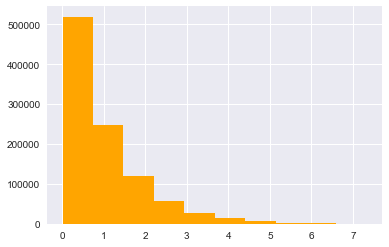

In [203]:
#plot the results obtained through the inverse transform method.
plt.hist(inverseFunction_(1000000), bins=[2.36812773e-03, 7.36193060e-01, 1.47001799e+00, 2.20384293e+00,2.93766786e+00, 3.67149279e+00, 4.40531772e+00, 5.13914266e+00,5.87296759e+00, 6.60679252e+00, 7.34061746e+00], color='orange')

In [142]:
#From the plot that we obtained we notice that the results are very similar, so the inverse transform method 
#has been well implemented, giving a good simulation of the Weibull distribution.

## Exercise 3

In [161]:
#Density of a normal
def gaussian(x, mean, dev=0.1):
    return 1/math.sqrt(2*math.pi) / dev * math.exp(-(x-mean)**2 / 2/dev**2)

In [167]:
#We generate data from a mixture normal density and then concatenate the samples.
N = 10000
a = 0.3 

sample1 = np.random.normal(0, 0.1, size=int(N*a)) #30% of the time the data come from the first normal
sample2 = np.random.normal(5, 0.3, size=int(N*(1-a))) #70% of the time we get data from the second component of the mixture model

sample = np.concatenate([sample1, sample2])

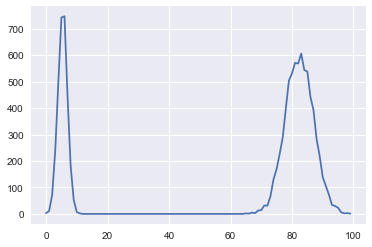

In [170]:
#We plot the results.

hist, bin_edges = np.histogram(sample, bins=100)
plt.plot(hist)

[-0.07363998  4.11835496  0.06557621  1.91044542  0.14693372]
[-0.02276496  4.63839942  0.07933071  1.3164675   0.24371375]
[8.45558475e-04 4.98938734e+00 9.68753701e-02 3.90909216e-01
 2.98078649e-01]
[2.00303878e-03 5.00258376e+00 9.87967513e-02 2.99184862e-01
 3.00000000e-01]
[2.00303878e-03 5.00258376e+00 9.87967513e-02 2.99184862e-01
 3.00000000e-01]


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


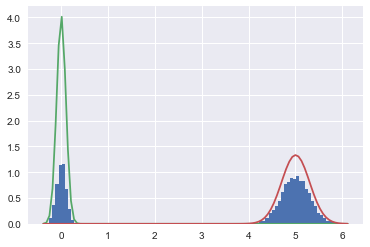

In [175]:
max_iter = 150

#Initial values
params = np.array([-1, 1, 0.2, 0.2, 0.5]) #initial mean of 1st component and 2nd component, std of 1st and 2nd component and the probability

counter = 0 #Number of iterations
converged = False 
tol = 0.01

plabel1 = np.zeros(sample.shape)
plabel2 = np.zeros(sample.shape)

while not converged and counter < max_iter:
    counter += 1
    
    mu1, mu2, sigma1, sigma2, pi_1 = params
    
    #1st step: Expectation step
    # From the expectation step we can compute, for given parameter values, 
    # the posterior probabilities
    
    for i in range(len(sample)):
        cdf1 = gaussian(sample[i], mu1, dev=sigma1)
        cdf2 = gaussian(sample[i], mu2, dev=sigma2)
        
        pi_2 = 1 - pi_1
        
        plabel1[i] = cdf1 * pi_1 / (cdf1 * pi_1 + cdf2 * pi_2) #Posterior probability (tau)
        plabel2[i] = cdf2 * pi_2 / (cdf1 * pi_1 + cdf2 * pi_2) #Posterior probability (tau)
        
    #2nd step: Maximization step
    # From the labeled data points we update the parameters of our model based on the latent variable 
    # calculated using ML method
    
    mu1 = sum(sample * plabel1)/sum(plabel1)
    mu2 = sum(sample * plabel2)/sum(plabel2)
    pi_1 = sum(plabel1)/len(sample)
    sigma1 = np.sqrt((sum(plabel1 * (sample - mu1)**2) / sum(plabel1)))
    sigma2 = np.sqrt((sum(plabel2 * (sample - mu2)**2) / sum(plabel2)))
    
    new_parameters = np.array([mu1, mu2, sigma1, sigma2, pi_1])
    print(new_parameters)
    
    #Finally we check for the convergence
    if np.max(abs(np.asarray(params) - np.asarray(new_parameters))) < tol:
        converged = True
        
    params = new_parameters

plt.hist(sample, bins = 100, normed = True)

x = np.linspace(sample.min(), sample.max(), 100)

plt.plot(x, mlab.normpdf(x, mu1, sigma1))
plt.plot(x, mlab.normpdf(x, mu2, sigma2))

plt.show()

## Exercise 4

In [176]:
#Implement a function to compute f(x, delta).
x = np.arange(0.0001, 2.5, 0.1)
def f(x, delta=1.5):
    if x>0:
        function = (delta/(x*np.sqrt(2 * np.pi))) * np.cosh(delta * np.log(2*x)) * np.exp((-np.sinh(delta * np.log(2*x))**2)/2)
    else:
        function = 0
    return function

0.9999999894169292


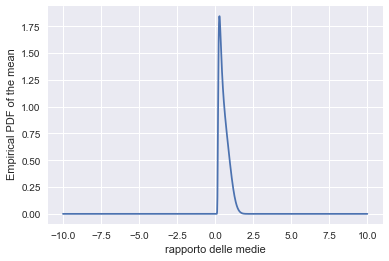

In [204]:
x=np.linspace(-10,10,1000)
y=np.empty(len(x))

for i in range(len(x)):
    y[i]=f(x[i])

_ = plt.plot(x, y)
_ = plt.xlabel("rapporto delle medie")
_ = plt.ylabel(" Empirical PDF of the mean")

#to check wheter it's correct  or not i can cumpute the integral, means the cumulative sum times the pace
print(np.sum(y)*(x[1]-x[0]))

In [205]:
#Implement a function to simulate from X using the Acceptance Rejection sampling, using an Exponential distribution (lambda = 1) 
#Target function is f(x, delta).
#The envelop is very important because the effiency of the algorithm depends on the choice of the envelop.
#A good envelop is close as possible to the target function.

#Envelop is exponential distribution.
def g(x):
    return stats.expon.pdf(x)

In [206]:
#Define alpha: alpha is the expected proportion of candidates accepted and it has values between zero and one.

#we used only positive numbers since the support of two distributions is positive 

x=np.linspace(0.01,10,10000)
max=0

# we built our own maximazation algorithm since it was easier

for i in range(len(x)):
    a=f(x[i])/g(x[i])
    if max<a:
        max=a

# only positive number
alpha = max**-1

In [207]:
#Code the AR algorithm
def AR_algorithm(n_iter):
    
    generated_sample = []
    for i in range(n_iter):
        Y = np.random.exponential(1)
        U = np.random.uniform(0, 1)  
 
        if U <= f(Y)*alpha/(g(Y)):
            generated_sample.append(Y)
    return np.array(generated_sample)

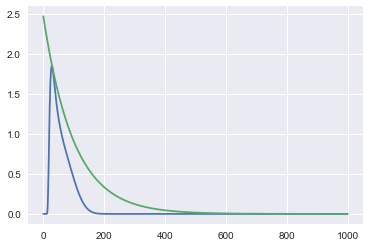

In [208]:
#Check wether e(x) envelop f(x).

x=np.linspace(0,10,1000)
y=np.empty(len(x))

for i in range(len(x)):
    y[i]=f(x[i])


plt.plot(y) #f(x)
plt.plot(1/alpha * g(x)) #e(x) 

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


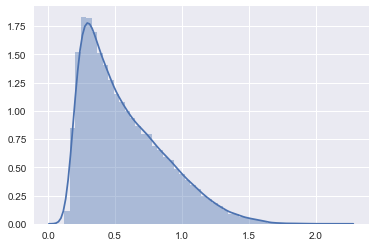

In [209]:
#Simulate the function.
simulation = AR_algorithm(100000)
sns.distplot(simulation)

In [210]:
# Estimate E(X**2)
# for the sample of y, we compute a sample of y^2
y=AR_algorithm(1000)**2

def bootstrap_replicate(data, function):
    bs_sample= np.random.choice(data, len(data))
    return function(bs_sample)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


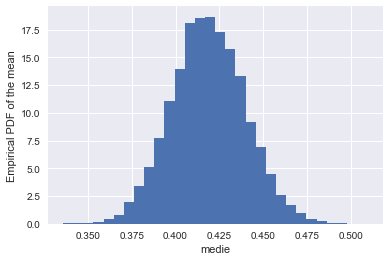

In [211]:
bs_results=np.empty(10000)
for i in range(10000):
    bs_results[i]= bootstrap_replicate(y,np.mean)
_ = plt.hist(bs_results, bins=30, normed=True)
_ = plt.xlabel("medie")
_ = plt.ylabel("Empirical PDF of the mean")

In [212]:
conf_interval = np.percentile(bs_results, [5, 95])
conf_interval

array([0.38417826, 0.4538538 ])